# Load dataset

In [ ]:
!wget https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz

--2021-02-27 19:30:08--  https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25342182 (24M) [application/x-gzip]
Saving to: ‘kinetics700_2020.tar.gz’

kinetics700_2020.ta 100%[===================>]  24.17M  49.1MB/s    in 0.5s    

2021-02-27 19:30:09 (49.1 MB/s) - ‘kinetics700_2020.tar.gz’ saved [25342182/25342182]



In [ ]:
import tarfile

tar = tarfile.open('kinetics700_2020.tar.gz', "r:gz")
tar.extractall()
tar.close()

[ERROR: IOPub data rate exceeded](https://stackoverflow.com/questions/50689784/in-google-collab-i-get-iopub-data-rate-exceeded)

[CSV](https://www.programiz.com/python-programming/reading-csv-files)

In [ ]:
import os
import csv
import numpy as np

file_path = '/content/kinetics700_2020'

data_train = []
label_train = []
data_test = []
label_test = []

fname = 'train.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0: # Ignore the header
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_train.append(dict_temp)
      label_train.append(row[0])
    
# Print the first 10 elements
print(data_train[:10])
print(label_train[:10])


# Use validation dataset as test set
fname = 'validate.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0:
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_test.append(dict_temp)
      label_test.append(row[0])

label_train = np.array(label_train)
label_test = np.array(label_test)

[{'url': '---0dWlqevI', 'time': [19.0, 29.0]}, {'url': '---aQ-tA5_A', 'time': [9.0, 19.0]}, {'url': '---j12rm3WI', 'time': [14.0, 24.0]}, {'url': '--07WQ2iBlw', 'time': [1.0, 11.0]}, {'url': '--0NTAs-fA0', 'time': [29.0, 39.0]}, {'url': '--0l35AkU34', 'time': [68.0, 78.0]}, {'url': '--33Lscn6sk', 'time': [4.0, 14.0]}, {'url': '--3OAstUWtU', 'time': [45.0, 55.0]}, {'url': '--3lTx87ebQ', 'time': [23.0, 33.0]}, {'url': '--3ouPhoy2A', 'time': [20.0, 30.0]}]
['clay pottery making', 'news anchoring', 'using bagging machine', 'javelin throw', 'climbing a rope', 'sipping cup', 'flipping pancake', 'tickling', 'watering plants', 'eating spaghetti']


# Action: cleaning shoes


In [ ]:
'''
  We are NOT modifying the stored original train data and train label,

  data_train, label_train,

  only working with indices and save the result to new arrays or lists
'''

target_label = 'cleaning shoes'
# Get indices of 'cleaning shoes' in training set
indices = np.where(label_train == target_label)[0]
train_raw = [] # Store raw info of train data: url & time
y_train = [] # Store train data labels

for idx in indices:
  train_raw.append(data_train[idx]) # Target class raw info
  y_train.append(1) # Target class label = 1

np.random.seed(0)
# Randomly shuffle the indices of all training data
shuffled_indices_total = np.random.permutation(len(data_train))
# Delete the indices of 'cleaning shoes' in training set
shuffled_indices_0 = shuffled_indices_total[~np.isin(
    shuffled_indices_total,indices
)]

# Append the rest of the training samples to train_raw,
# equal number of label 0 as label 1 (target)
# Indices already shuffled, so this is in random order
for i in range(len(indices)):
  train_raw.append(data_train[shuffled_indices_0[i]])
  y_train.append(0)

'''
  Do the same thing for test set
'''
indices_test = np.where(label_test == target_label)[0]
test_raw = []
y_test = []

# Target class in validation set
for idx in indices_test:
  test_raw.append(data_test[idx])
  y_test.append(1)

np.random.seed(0)
shuffled_indices_test = np.random.permutation(len(data_test))
shuffled_indices_test_0 = shuffled_indices_test[~np.isin(
    shuffled_indices_test,indices_test
)]

for i in range(len(indices_test)):
  test_raw.append(data_test[shuffled_indices_test_0[i]])
  y_test.append(0)

In [ ]:
!pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 5.3MB/s 


Make directory for the Kinetics dataset

In [ ]:
import os

# Directory for the Kinetics dataset
kinetics_dir = '/content/kinetics'
os.mkdir(kinetics_dir)

# Directory for train and test set for Kinetics
train_dir = os.path.join(kinetics_dir,'train')
os.mkdir(train_dir)
test_dir = os.path.join(kinetics_dir,'test')
os.mkdir(test_dir)

# Directory for target and supplementary classes
train_target_dir = os.path.join(train_dir,'target')
os.mkdir(train_target_dir)
train_others_dir = os.path.join(train_dir,'others')
os.mkdir(train_others_dir)
test_target_dir = os.path.join(test_dir,'target')
os.mkdir(test_target_dir)
test_others_dir = os.path.join(test_dir,'others')
os.mkdir(test_others_dir)

Import specific part of video from YouTube

In [ ]:
import youtube_dl, subprocess
import datetime
import time

'''
  Training and validation set
'''

for i, info in enumerate(train_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_train[i] == 1:
    TARGET = os.path.join(train_target_dir,"cleaning_shoes.{}.mp4".format(i))
  else:
    TARGET = os.path.join(train_others_dir,"others.{}.mp4".format(
        i - y_train.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  time.sleep(1)
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  


In [ ]:
import youtube_dl, subprocess
import datetime

'''
  Test set
'''
for i, info in enumerate(test_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_test[i] == 1:
    TARGET = os.path.join(test_target_dir,"cleaning_shoes.{}.mp4".format(i))
  else:
    TARGET = os.path.join(test_others_dir,"others.{}.mp4".format(
        i - y_test.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  

Download videos from Google Colab

In [ ]:
!zip -r /content/file.zip /content/kinetics

  adding: content/kinetics/ (stored 0%)
  adding: content/kinetics/test/ (stored 0%)
  adding: content/kinetics/test/others/ (stored 0%)
  adding: content/kinetics/test/others/others.21.mp4 (deflated 1%)
  adding: content/kinetics/test/others/others.22.mp4 (deflated 1%)
  adding: content/kinetics/test/others/others.33.mp4 (deflated 2%)
  adding: content/kinetics/test/others/others.2.mp4 (deflated 0%)
  adding: content/kinetics/test/others/others.38.mp4 (deflated 0%)
  adding: content/kinetics/test/others/others.7.mp4 (deflated 2%)
  adding: content/kinetics/test/others/others.16.mp4 (deflated 1%)
  adding: content/kinetics/test/others/others.35.mp4 (deflated 1%)
  adding: content/kinetics/test/others/others.0.mp4 (deflated 0%)
  adding: content/kinetics/test/others/others.41.mp4 (deflated 1%)
  adding: content/kinetics/test/others/others.3.mp4 (deflated 1%)
  adding: content/kinetics/test/others/others.8.mp4 (deflated 2%)
  adding: content/kinetics/test/others/others.34.mp4 (deflated 1

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load videos from Drive + preprocess

*   Section all videos frame by frame
*   Preprocess videos

Video frame generator

[Keras video frame generator](https://medium.com/smileinnovation/training-neural-network-with-image-sequence-an-example-with-video-as-input-c3407f7a0b0f)

In [ ]:
!pip install keras-video-generators

In [ ]:
import keras
import keras_video.utils
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/Colab Notebooks/kinetics/train/{classname}/*.mp4'
# Data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    split_val=0.2,  # 20% of the videos will be used as validation set. 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

val = train.get_validation_generator()

# keras_video.utils.show_sample(train)

class others, validation count: 164, train count: 658
class target, validation count: 164, train count: 660
Total data: 2 classes for 1318 files for train
Total data: 2 classes for 328 files for validation


# Build model and train the network

## Build model

In [ ]:
import keras
from keras import backend
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GlobalMaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.applications import Xception

# The pretrained network we will use
conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(112, 112, 3))
conv_base.trainable = False

def action_model(shape=(NFRAME, 112, 112, 3), outputs=2):
    
    # Flatten output of conv_base
    model0 = Sequential()
    model0.add(conv_base)
    model0.add(GlobalMaxPool2D())
    # Build our model for training
    model = Sequential()
    model.add(TimeDistributed(model0, input_shape=shape))
    # LSTM for time series
    model.add(LSTM(64))
    # Build the classifier
    # model.add(Dense(1024, activation='relu'))
    # model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(outputs, activation='sigmoid'))
    return model

INSHAPE=(NFRAME,) + SIZE + (CHANNELS,) # (15, 112, 112, 3)
model = action_model(INSHAPE, len(classes))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 25, 2048)          20861480  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                540928    
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
optimizer= Adam(lr=1e-4)
model.compile(optimizer=optimizer , 
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the network

['val_loss' not available](https://stackoverflow.com/questions/49035200/keras-early-stopping-callback-error-val-loss-metric-not-available)

In [ ]:
import time

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_loss',
        # factor = 0.1,
        # patience = 10,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = 'cleaning_renovate_shoes_Xception_try.h5',
        monitor = 'val_loss',
        save_best_only = True,
                 ),
]

start = time.time()
history = model.fit(
                    train,
                    steps_per_epoch = 20,
                    #batch_size= 10,
                    epochs = 30,
                    callbacks=callbacks,
                    validation_data= val,
                    validation_steps = 10,)
finish = time.time()
print("Total training time: ", finish - start)

Epoch 1/30
 7/20 [=========>....................] - ETA: 1:00 - loss: 0.7202 - accuracy: 0.4276

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


11/20 [===============>..............] - ETA: 43s - loss: 0.7169 - accuracy: 0.4311

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.7135 - accuracy: 0.4398

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 166s 8s/step - loss: 0.7132 - accuracy: 0.4408 - val_loss: 0.6918 - val_accuracy: 0.5253
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.5397

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.508.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 112s 5s/step - loss: 0.6958 - accuracy: 0.5423 - val_loss: 0.6849 - val_accuracy: 0.6122
Epoch 3/30
10/20 [==============>...............] - ETA: 37s - loss: 0.6951 - accuracy: 0.5365

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.786.mp4, 0 total, 0 extracted


11/20 [===============>..............] - ETA: 33s - loss: 0.6949 - accuracy: 0.5373

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


16/20 [=======================>......] - ETA: 14s - loss: 0.6943 - accuracy: 0.5387

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - 94s 5s/step - loss: 0.6934 - accuracy: 0.5419 - val_loss: 0.6744 - val_accuracy: 0.7500
Epoch 4/30
 4/20 [=====>........................] - ETA: 35s - loss: 0.6864 - accuracy: 0.5063

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


17/20 [========================>.....] - ETA: 8s - loss: 0.6875 - accuracy: 0.5294 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.5362

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 69s 3s/step - loss: 0.6867 - accuracy: 0.5384 - val_loss: 0.6705 - val_accuracy: 0.7576
Epoch 5/30
13/20 [==================>...........] - ETA: 19s - loss: 0.6796 - accuracy: 0.5737

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6771 - accuracy: 0.5799

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 74s 4s/step - loss: 0.6768 - accuracy: 0.5815 - val_loss: 0.6501 - val_accuracy: 0.7475
Epoch 6/30
10/20 [==============>...............] - ETA: 29s - loss: 0.6652 - accuracy: 0.6380

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.786.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6668

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 66s 3s/step - loss: 0.6617 - accuracy: 0.6671 - val_loss: 0.6205 - val_accuracy: 0.8485
Epoch 7/30
 3/20 [===>..........................] - ETA: 18s - loss: 0.6608 - accuracy: 0.7778

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


 7/20 [=========>....................] - ETA: 26s - loss: 0.6603 - accuracy: 0.7297

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6506 - accuracy: 0.7253

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.508.mp4, 0 total, 0 extracted


20/20 [==============================] - 46s 2s/step - loss: 0.6502 - accuracy: 0.7247 - val_loss: 0.5949 - val_accuracy: 0.8283
Epoch 8/30
17/20 [========================>.....] - ETA: 6s - loss: 0.6063 - accuracy: 0.8206

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


20/20 [==============================] - 47s 2s/step - loss: 0.6042 - accuracy: 0.8150 - val_loss: 0.5407 - val_accuracy: 0.8400
Epoch 9/30
 4/20 [=====>........................] - ETA: 34s - loss: 0.6157 - accuracy: 0.6813

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


14/20 [====================>.........] - ETA: 9s - loss: 0.5977 - accuracy: 0.7314 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - 36s 2s/step - loss: 0.5896 - accuracy: 0.7442 - val_loss: 0.4624 - val_accuracy: 0.8500
Epoch 10/30
 7/20 [=========>....................] - ETA: 17s - loss: 0.5589 - accuracy: 0.7343

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


 8/20 [===========>..................] - ETA: 15s - loss: 0.5555 - accuracy: 0.7393

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.5312 - accuracy: 0.7732

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 33s 2s/step - loss: 0.5313 - accuracy: 0.7736 - val_loss: 0.4217 - val_accuracy: 0.8586
Epoch 11/30
 4/20 [=====>........................] - ETA: 24s - loss: 0.4195 - accuracy: 0.9667

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


10/20 [==============>...............] - ETA: 17s - loss: 0.4572 - accuracy: 0.8966

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


19/20 [===========================>..] - ETA: 1s - loss: 0.4623 - accuracy: 0.8778

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.16.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.4632 - accuracy: 0.8763

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 33s 2s/step - loss: 0.4641 - accuracy: 0.8749 - val_loss: 0.3989 - val_accuracy: 0.8384
Epoch 12/30
 5/20 [======>.......................] - ETA: 19s - loss: 0.3897 - accuracy: 0.8740

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


19/20 [===========================>..] - ETA: 1s - loss: 0.4295 - accuracy: 0.8457

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.4296 - accuracy: 0.8455

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 35s 2s/step - loss: 0.4298 - accuracy: 0.8454 - val_loss: 0.3902 - val_accuracy: 0.8283
Epoch 13/30
 6/20 [========>.....................] - ETA: 11s - loss: 0.5289 - accuracy: 0.7200

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.786.mp4, 0 total, 0 extracted


16/20 [=======================>......] - ETA: 5s - loss: 0.5145 - accuracy: 0.7486

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.5061 - accuracy: 0.7583

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 27s 1s/step - loss: 0.5039 - accuracy: 0.7607 - val_loss: 0.3815 - val_accuracy: 0.8384
Epoch 14/30
20/20 [==============================] - 27s 1s/step - loss: 0.4650 - accuracy: 0.7847 - val_loss: 0.3277 - val_accuracy: 0.8600
Epoch 15/30
 4/20 [=====>........................] - ETA: 14s - loss: 0.3267 - accuracy: 0.8417

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.16.mp4, 0 total, 0 extracted


11/20 [===============>..............] - ETA: 8s - loss: 0.3234 - accuracy: 0.8737

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.786.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8757

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.508.mp4, 0 total, 0 extracted


20/20 [==============================] - 21s 1s/step - loss: 0.3415 - accuracy: 0.8758 - val_loss: 0.3598 - val_accuracy: 0.8586
Epoch 16/30
 2/20 [==>...........................] - ETA: 13s - loss: 0.2983 - accuracy: 0.9000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3551 - accuracy: 0.8679

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.508.mp4, 0 total, 0 extracted


20/20 [==============================] - 21s 1s/step - loss: 0.3564 - accuracy: 0.8665 - val_loss: 0.2923 - val_accuracy: 0.8673
Epoch 17/30
 1/20 [>.............................] - ETA: 16s - loss: 0.3456 - accuracy: 0.8000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.786.mp4, 0 total, 0 extracted


 7/20 [=========>....................] - ETA: 10s - loss: 0.4660 - accuracy: 0.7908

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 8s - loss: 0.4669 - accuracy: 0.7898

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


13/20 [==================>...........] - ETA: 6s - loss: 0.4618 - accuracy: 0.7923

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 21s 1s/step - loss: 0.4608 - accuracy: 0.7962 - val_loss: 0.3595 - val_accuracy: 0.8200
Epoch 18/30
 4/20 [=====>........................] - ETA: 18s - loss: 0.3965 - accuracy: 0.8104

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 9s - loss: 0.3700 - accuracy: 0.8438 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3820 - accuracy: 0.8405

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.508.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 23s 1s/step - loss: 0.3830 - accuracy: 0.8404 - val_loss: 0.3312 - val_accuracy: 0.8454
Epoch 19/30
 2/20 [==>...........................] - ETA: 17s - loss: 0.3035 - accuracy: 0.9000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.16.mp4, 0 total, 0 extracted


 3/20 [===>..........................] - ETA: 14s - loss: 0.3261 - accuracy: 0.8667

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.786.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3964 - accuracy: 0.8095

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 21s 1s/step - loss: 0.3975 - accuracy: 0.8092 - val_loss: 0.3364 - val_accuracy: 0.8687
Epoch 20/30
20/20 [==============================] - ETA: 0s - loss: 0.3727 - accuracy: 0.8008

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.508.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 18s 909ms/step - loss: 0.3735 - accuracy: 0.8012 - val_loss: 0.3229 - val_accuracy: 0.8776
Epoch 21/30
20/20 [==============================] - 18s 902ms/step - loss: 0.4421 - accuracy: 0.8078 - val_loss: 0.3023 - val_accuracy: 0.8700
Epoch 22/30
 2/20 [==>...........................] - ETA: 13s - loss: 0.5326 - accuracy: 0.7500

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.786.mp4, 0 total, 0 extracted


 4/20 [=====>........................] - ETA: 16s - loss: 0.5110 - accuracy: 0.7634

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


20/20 [==============================] - 19s 949ms/step - loss: 0.4042 - accuracy: 0.8440 - val_loss: 0.3712 - val_accuracy: 0.8600
Epoch 23/30
 7/20 [=========>....................] - ETA: 10s - loss: 0.3237 - accuracy: 0.8588

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3827 - accuracy: 0.8258

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 19s 948ms/step - loss: 0.3850 - accuracy: 0.8238 - val_loss: 0.2697 - val_accuracy: 0.9091
Epoch 24/30
20/20 [==============================] - 19s 939ms/step - loss: 0.4042 - accuracy: 0.8359 - val_loss: 0.3109 - val_accuracy: 0.8700
Epoch 25/30
17/20 [========================>.....] - ETA: 2s - loss: 0.3752 - accuracy: 0.8848

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3700 - accuracy: 0.8833

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.508.mp4, 0 total, 0 extracted


20/20 [==============================] - 20s 989ms/step - loss: 0.3684 - accuracy: 0.8831 - val_loss: 0.2503 - val_accuracy: 0.9200
Epoch 26/30
 5/20 [======>.......................] - ETA: 10s - loss: 0.3003 - accuracy: 0.8980

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


 6/20 [========>.....................] - ETA: 9s - loss: 0.3096 - accuracy: 0.8839 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3532 - accuracy: 0.8164

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.508.mp4, 0 total, 0 extracted


20/20 [==============================] - 17s 870ms/step - loss: 0.3546 - accuracy: 0.8155 - val_loss: 0.2516 - val_accuracy: 0.9286
Epoch 27/30
 4/20 [=====>........................] - ETA: 11s - loss: 0.1973 - accuracy: 0.9583

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2794 - accuracy: 0.8885

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 18s 913ms/step - loss: 0.2816 - accuracy: 0.8872 - val_loss: 0.2938 - val_accuracy: 0.8889
Epoch 28/30
 5/20 [======>.......................] - ETA: 12s - loss: 0.3318 - accuracy: 0.8597

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.479.mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 7s - loss: 0.3789 - accuracy: 0.8470

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 18s 898ms/step - loss: 0.3889 - accuracy: 0.8456 - val_loss: 0.2797 - val_accuracy: 0.8900
Epoch 29/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


 6/20 [========>.....................] - ETA: 9s - loss: 0.3681 - accuracy: 0.8460 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/running on treadmill.786.mp4, 0 total, 0 extracted


17/20 [========================>.....] - ETA: 2s - loss: 0.3536 - accuracy: 0.8700

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3525 - accuracy: 0.8726

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 18s 861ms/step - loss: 0.3520 - accuracy: 0.8733 - val_loss: 0.2888 - val_accuracy: 0.8571
Epoch 30/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


 2/20 [==>...........................] - ETA: 11s - loss: 0.1746 - accuracy: 0.9737

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3317 - accuracy: 0.8772

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 17s 869ms/step - loss: 0.3331 - accuracy: 0.8763 - val_loss: 0.2760 - val_accuracy: 0.8990
Total training time:  1187.1501369476318


Plot the learning curve

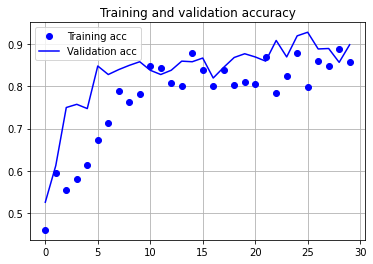

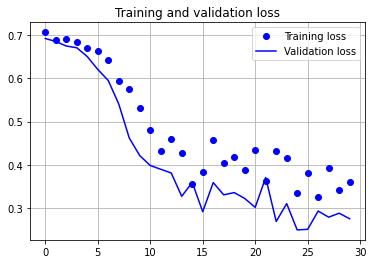

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid(axis='both')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(axis='both')
plt.legend()

plt.show()

# Test on test set

In [ ]:
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/Colab Notebooks/kinetics/test/{classname}/*.mp4'

# Create video frame generator
test = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    shuffle=False,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    use_frame_cache=True)

Total data: 2 classes for 91 files for train


In [ ]:
model.evaluate(test)

# Scraping and parsing from YouTube query

In [ ]:
import requests
import json
from bs4 import BeautifulSoup

# keywords = ['python', 'youtube', 'scraper']
keywords = ['cleaning shoes','renovating shoes']
pages = 5

baseUrl = 'https://www.youtube.com'
headMatch = '{"responseContext"'
tailMatch = ';</script>'
outputFile = open('output.csv', 'w')
debugFile = open('debug.txt', 'w')
outputLines = []

for page in range(1, pages+1):
    response = requests.get(baseUrl+'/results?search_query='+'+'.join(keywords)+'&page='+str(page))
    soup = BeautifulSoup(response.text, 'html.parser')
    debugFile.write(soup.prettify())
    jsonStr = ''

    for script in soup.find_all('script'):
        scriptStr = str(script)
        headIndex = scriptStr.find(headMatch)
        if headIndex != -1:
            tailIndex = scriptStr.find(tailMatch)
            jsonStr = scriptStr[headIndex:tailIndex]
            break

    data = json.loads(jsonStr)
    contents = data['contents']['twoColumnSearchResultsRenderer']['primaryContents']['sectionListRenderer']['contents'][0]['itemSectionRenderer']['contents']
    for content in contents:
        if 'videoRenderer' in content:
            title = content['videoRenderer']['title']['runs'][0]['text'].replace(',', ' ')
            url = content['videoRenderer']['navigationEndpoint']['commandMetadata']['webCommandMetadata']['url']
            outputLines.append(title+','+baseUrl+url)

outputFile.write('title,url\n'+'\n'.join(outputLines))

10310

# Download youtube videos

Make directory for the youtube videos

In [ ]:
import os

# Directory for the YouTube videos
youtube_dir = '/content/youtube'
os.mkdir(youtube_dir)

Download YouTube videos from scraped information

In [ ]:
!pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 5.1MB/s 


In [ ]:
import youtube_dl, subprocess
import datetime
import numpy as np


'''
  YouTube videos
'''

links = [#'https://www.youtube.com/watch?v=N2GKFGNnJyk',
         ]
for i, link in enumerate(links):
  for j in range(0,60,2): # The range is the number of seconds to test
    URL = link # url of YouTube video
    FROM = str(datetime.timedelta(seconds=j))
    LENGTH = str(datetime.timedelta(seconds=2))
    TARGET = os.path.join(youtube_dir,"test.{}.mp4".format(np.int(j/2)))
    
    with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
      try:
        result = ydl.extract_info(URL, download=False)
        video = result['entries'][0] if 'entries' in result else result
      except:
        continue
      
    url = video['url']
    subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                    '-c:v', 'copy', '-c:a', 'copy', TARGET,]) 
  

[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage
[youtube] 8qcBqg9ZdAI: Downloading webpage


# Test on YouTube videos and write to .json

Load saved model

In [ ]:
import keras
from keras.models import load_model

test_model = load_model('cleaning_renovate_shoes_Xception_try.h5')

Function for predicting whether clip contains target action and write to file

In [ ]:
import numpy as np
import cv2
import json
from time import sleep
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


img_rows, img_cols, img_depth = 112, 112, 25

def load_video(path, max_frames=0, resize=(112, 112)):
  cap = cv2.VideoCapture(path)
  frames = []
  try:
    while True:
      ret, frame = cap.read()
      if frame is not None:
        frame = cv2.resize(frame, resize)
        frame = frame[:, :, [2, 1, 0]]
        frames.append(frame)
        # plt.imshow(frame) 

      else:
        # print("Frame is None")
        break
      
      if len(frames) == max_frames:
        break
  finally:
    cap.release()
  return np.array(frames) / 255.0

videos = []

for i in range(30): # The number of clips downloaded to test
  try:
    frames = load_video('/content/youtube/test.{}.mp4'.format(i),max_frames=25)

    frames = np.expand_dims(frames,axis=0)

    p = test_model.predict(frames, batch_size = 1) # verbose = 1
    # print(p)
    prob = p[0][1]

    if prob > 0.5:
        temp = {
            'videoID': "N2GKFGNnJyk", # Change to video ID
            'type': "segment",
            'startTime': np.float(i*2),
            'endTime': np.float((i+1)*2),
            'observer': 'CSCE636Spring2021-astrajoan-3',
            'isHuman': 'false',
            'confirmedBySomeone': 'false',
            'rejectedBySomeone': 'false',
            'observation': {
                'label': 'House_work_on_clothes_shoes_hats_etc',
                'labelConfidence': np.float(prob),
            }
        }

        videos.append(temp)

  except:
    continue

with open('1.json', 'w', encoding='utf-8') as f:
  json.dump(videos, f, indent=4)


